In [1]:
import pandas as pd
import numpy as np
from scipy import stats


In [2]:
df=pd.read_excel('Book1.xlsx')

In [3]:
# Returns number of rows and columns of the dataset
df.shape

(38, 5)

In [4]:
# Returns an object with all of the column headers
df.columns

Index(['Unnamed: 0', 'Visit 1 - Baseline', 'Visit 1 - Timm', 'Visit 2',
       'Visit 3'],
      dtype='object')

In [5]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

Unnamed: 0              int64
Visit 1 - Baseline    float64
Visit 1 - Timm        float64
Visit 2               float64
Visit 3               float64
dtype: object

In [6]:
# Returns the first x number of rows when head(x). Without a number it returns 5
df.head()

,Unnamed: 0,Visit 1 - Baseline,Visit 1 - Timm,Visit 2,Visit 3
0,1,41.833333,46.550000,54.066667,61.133333
1,2,47.550000,52.466667,58.350000,65.683333
2,3,32.083333,35.800000,43.583333,51.833333
3,4,38.816667,44.383333,51.116667,55.050000
4,5,35.850000,41.283333,46.050000,52.250000


In [7]:
# Returns the last x number of rows when tail(x). Without a number it returns 5
df.tail()

,Unnamed: 0,Visit 1 - Baseline,Visit 1 - Timm,Visit 2,Visit 3
33,36,45.300000,51.066667,58.550000,68.366667
34,37,41.133333,47.916667,55.683333,64.850000
35,38,48.816667,51.500000,62.050000,71.800000
36,39,33.300000,38.433333,48.366667,56.316667
37,40,42.133333,44.633333,52.016667,61.566667


In [8]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,38.0,19.815789,11.589500,1.000000,10.250000,19.500000,28.750000,40.000000
Visit 1 - Baseline,38.0,41.121316,5.188431,32.083333,37.115000,41.983333,45.475000,49.416667
Visit 1 - Timm,38.0,45.900439,5.078372,35.716667,42.262500,45.966667,49.933333,53.350000
Visit 2,38.0,53.356360,4.927613,43.333333,50.079167,53.191667,57.441667,62.050000
Visit 3,38.0,61.750877,5.384717,51.833333,57.833333,61.983333,65.945833,71.800000


In [9]:
# Importing essential libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\nirma\AppData\Local\Temp\ipykernel_21124\1536943719.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  g = df.hist(ax=ax)


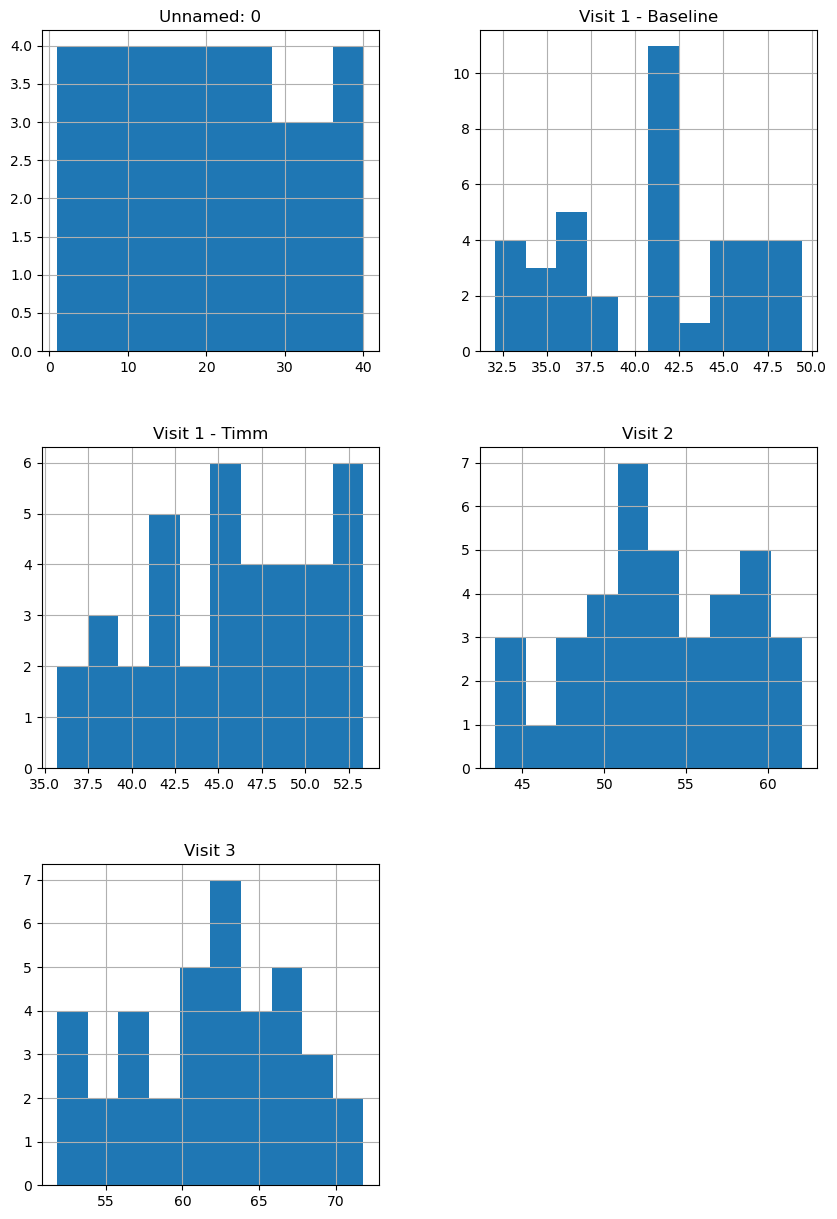

In [10]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (10,15))
ax = fig.gca()
g = df.hist(ax=ax)

Text(0.5, 1.0, 'Before Sampling')

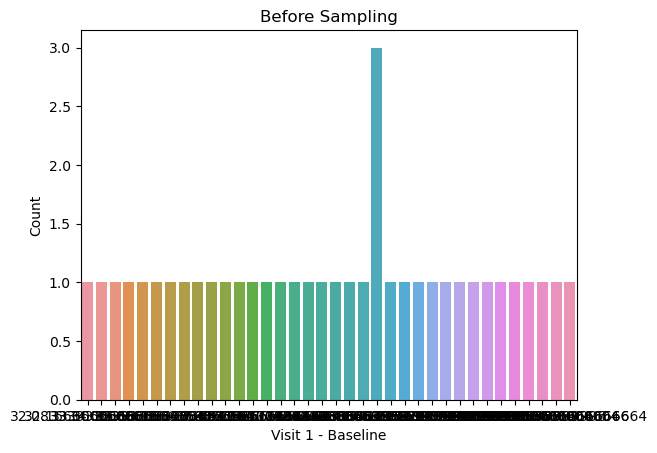

In [11]:
# Visualization to check if the dataset is balanced or not
g = sns.countplot(x='Visit 1 - Baseline', data=df)
plt.xlabel('Visit 1 - Baseline')
plt.ylabel('Count')
plt.title('Before Sampling')

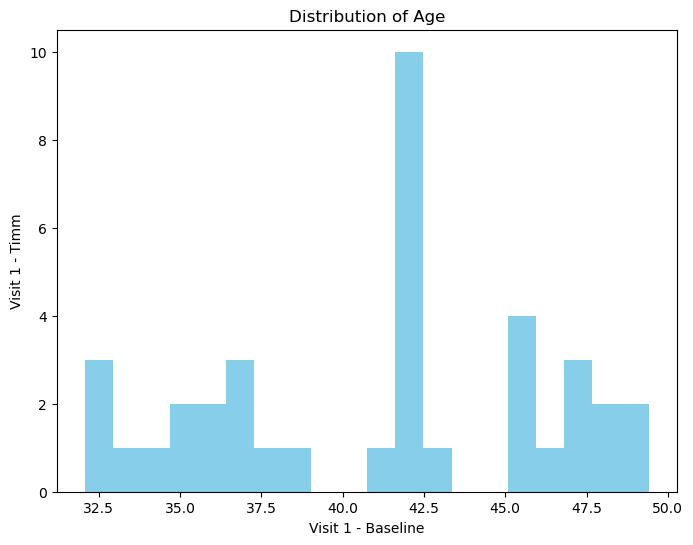

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df['Visit 1 - Baseline'], bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Visit 1 - Baseline')
plt.ylabel('Visit 1 - Timm')
plt.show()

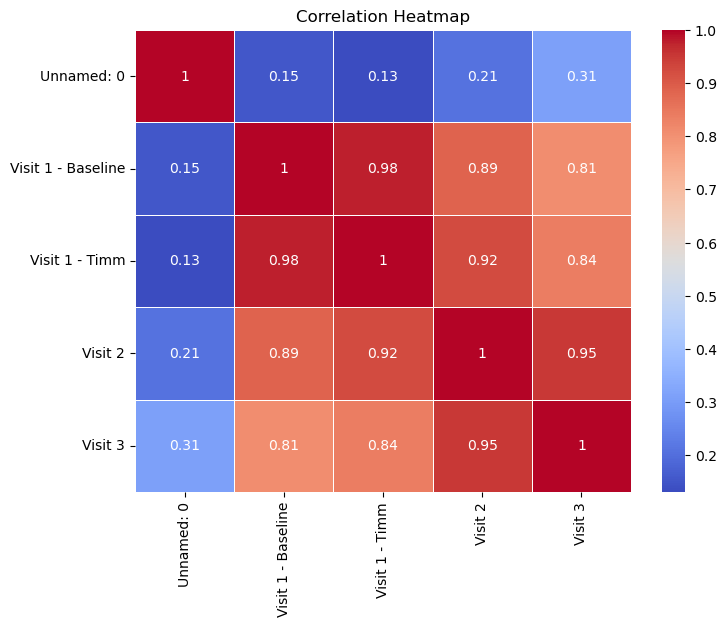

In [13]:
# Correlation heatmap for numerical variables
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


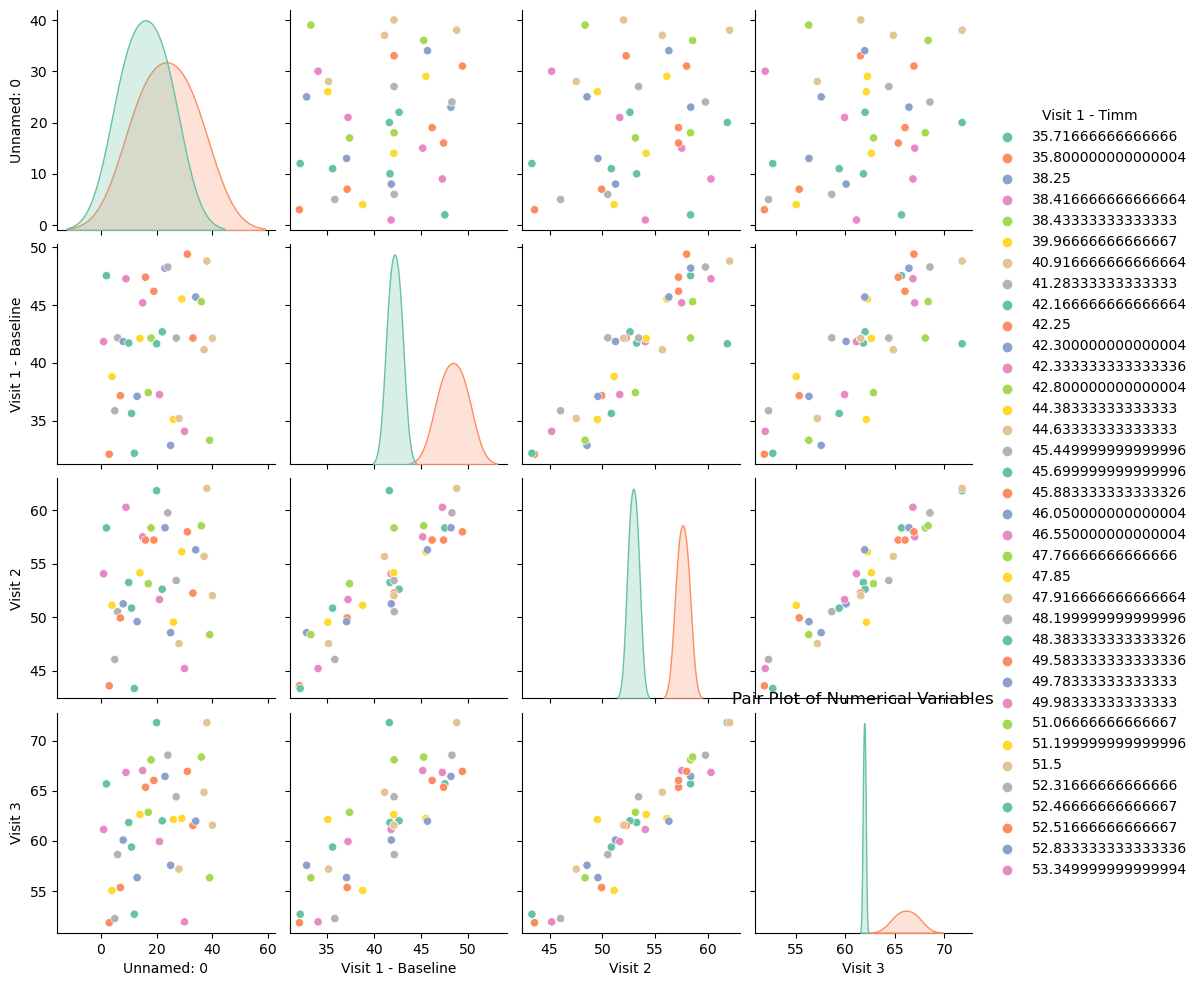

In [14]:
# Pair plot for numerical variables (scatterplot matrix)
sns.pairplot(df, hue='Visit 1 - Timm', palette='Set2')
plt.title('Pair Plot of Numerical Variables')
plt.show()

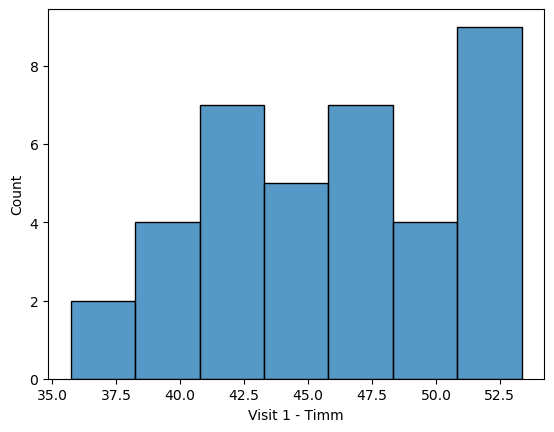

In [15]:
sns.histplot(data = df , x = 'Visit 1 - Timm');

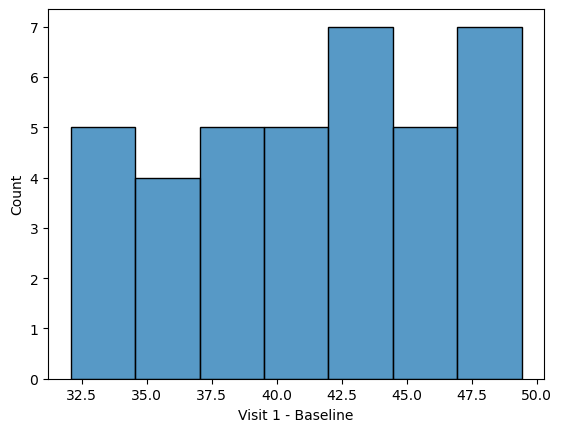

In [16]:
sns.histplot(data = df , x = 'Visit 1 - Baseline');

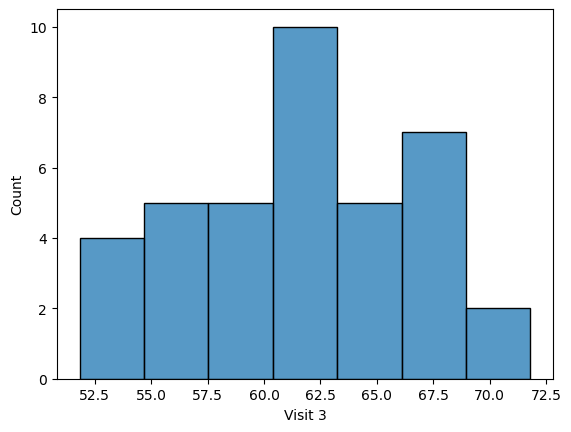

In [17]:
sns.histplot(data = df , x = 'Visit 3');

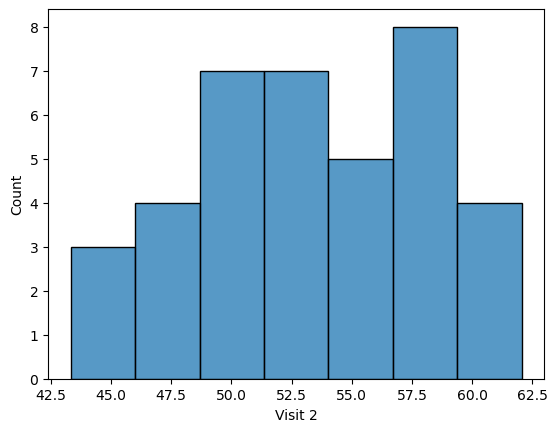

In [18]:
sns.histplot(data = df , x = 'Visit 2');

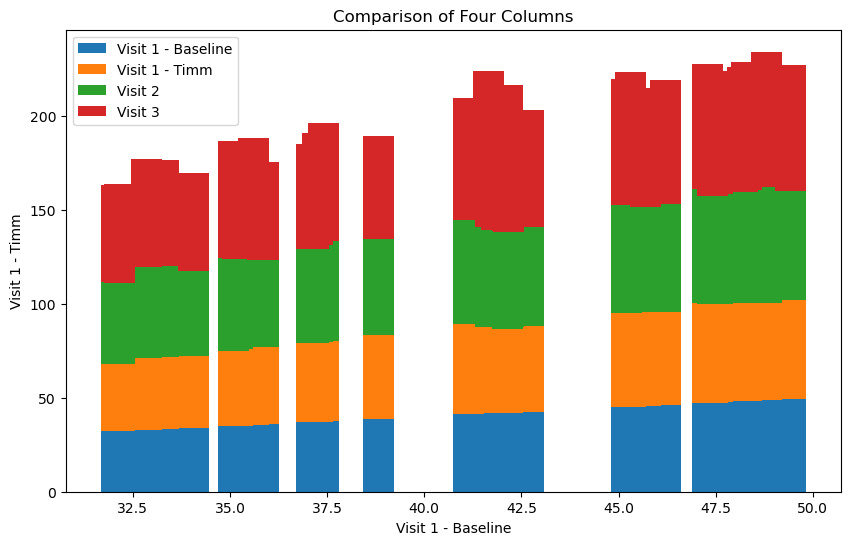

In [20]:
# Define the columns to compare
columns_to_compare = ['Visit 1 - Baseline', 'Visit 1 - Timm', 'Visit 2', 'Visit 3']

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Visit 1 - Baseline'], df[columns_to_compare[0]], label=columns_to_compare[0])
plt.bar(df['Visit 1 - Baseline'], df[columns_to_compare[1]], label=columns_to_compare[1], bottom=df[columns_to_compare[0]])
plt.bar(df['Visit 1 - Baseline'], df[columns_to_compare[2]], label=columns_to_compare[2], bottom=df[columns_to_compare[0]] + df[columns_to_compare[1]])
plt.bar(df['Visit 1 - Baseline'], df[columns_to_compare[3]], label=columns_to_compare[3], bottom=df[columns_to_compare[0]] + df[columns_to_compare[1]] + df[columns_to_compare[2]])

# Add labels and legend
plt.xlabel('Visit 1 - Baseline')
plt.ylabel('Visit 1 - Timm')
plt.title('Comparison of Four Columns')
plt.legend()

# Show the plot
plt.show()

In [21]:
# Calculate changes in L* values
df['Change_L*_Timm'] = df['Visit 1 - Timm'] - df['Visit 1 - Baseline']
df['Change_L*_Day7'] = df['Visit 2'] - df['Visit 1 - Baseline']
df['Change_L*_Day14'] = df['Visit 3'] - df['Visit 1 - Baseline']


In [22]:
# Calculate changes in skin hydration values
df['Change_hydration_Timm'] = df['Visit 1 - Timm'] - df['Visit 1 - Baseline']
df['Change_hydration_Day7'] = df['Visit 2'] - df['Visit 1 - Baseline']
df['Change_hydration_Day14'] = df['Visit 3'] - df['Visit 1 - Baseline']

In [23]:
# Perform paired t-tests for changes in L* values
t_stat_l_star_timm, p_value_l_star_timm = stats.ttest_rel(df['Change_L*_Timm'], [0] * len(df))
t_stat_l_star_day7, p_value_l_star_day7 = stats.ttest_rel(df['Change_L*_Day7'], [0] * len(df))
t_stat_l_star_day14, p_value_l_star_day14 = stats.ttest_rel(df['Change_L*_Day14'], [0] * len(df))

In [24]:
# Perform paired t-tests for changes in skin hydration values
t_stat_hydration_timm, p_value_hydration_timm = stats.ttest_rel(df['Change_hydration_Timm'], [0] * len(df))
t_stat_hydration_day7, p_value_hydration_day7 = stats.ttest_rel(df['Change_hydration_Day7'], [0] * len(df))
t_stat_hydration_day14, p_value_hydration_day14 = stats.ttest_rel(df['Change_hydration_Day14'], [0] * len(df))

In [25]:
# Print the results
print("Paired t-tests for changes in L* values:")
print(f"Change_L*_Timm - t-statistic = {t_stat_l_star_timm}, p-value = {p_value_l_star_timm}")
print(f"Change_L*_Day7 - t-statistic = {t_stat_l_star_day7}, p-value = {p_value_l_star_day7}")
print(f"Change_L*_Day14 - t-statistic = {t_stat_l_star_day14}, p-value = {p_value_l_star_day14}")

Paired t-tests for changes in L* values:
Change_L*_Timm - t-statistic = 26.2440740303999, p-value = 1.6324029500782548e-25
Change_L*_Day7 - t-statistic = 31.06461968410925, p-value = 4.151866256045991e-28
Change_L*_Day14 - t-statistic = 38.91888105254171, p-value = 1.2640657221860468e-31


In [26]:
print("\nPaired t-tests for changes in skin hydration values:")
print(f"Change_hydration_Timm - t-statistic = {t_stat_hydration_timm}, p-value = {p_value_hydration_timm}")
print(f"Change_hydration_Day7 - t-statistic = {t_stat_hydration_day7}, p-value = {p_value_hydration_day7}")
print(f"Change_hydration_Day14 - t-statistic = {t_stat_hydration_day14}, p-value = {p_value_hydration_day14}")


Paired t-tests for changes in skin hydration values:
Change_hydration_Timm - t-statistic = 26.2440740303999, p-value = 1.6324029500782548e-25
Change_hydration_Day7 - t-statistic = 31.06461968410925, p-value = 4.151866256045991e-28
Change_hydration_Day14 - t-statistic = 38.91888105254171, p-value = 1.2640657221860468e-31


In this code:

We calculate the changes in L* values and skin hydration values for 'Visit 1 - Timm', 'Visit 2', and 'Visit 3' compared to 'Visit 1 - Baseline'.
We perform paired t-tests for each set of changes to determine if there is a significant improvement in L* values and skin hydration values at each visit.
We print the t-statistics and p-values to assess the significance of the changes.
Replace 'data.csv' with your actual data source, and adjust the column names as needed. This code performs statistical analysis to determine if there is a significant improvement in L* and skin hydration values at each visit.

In [28]:
import pandas as pd

data = {
    'Visit 1 - Baseline': [41.83, 47.55, 32.08, 38.82, 35.85, 42.17, 37.16, 41.85, 47.28, 41.72, 35.62, 32.17, 37.10, 42.12, 45.20, 47.42, 37.42, 42.15, 46.20, 41.65, 37.25, 42.68, 48.20, 48.30, 32.85, 35.10, 42.15, 35.18, 45.53, 34.07, 49.42, 42.15, 45.70, 45.30, 41.13, 48.82, 33.30, 42.13],
    'Visit 1 - Timm': [46.55, 52.47, 35.80, 44.38, 41.28, 45.45, 42.25, 46.05, 53.35, 45.70, 42.17, 35.72, 42.30, 47.85, 49.98, 52.52, 42.80, 47.77, 49.58, 48.38, 42.33, 45.70, 52.83, 52.32, 38.25, 39.97, 48.20, 40.92, 51.20, 38.42, 52.52, 45.88, 49.78, 51.07, 47.92, 51.50, 38.43, 44.63],
    'Visit 2': [54.07, 58.35, 43.58, 51.12, 46.05, 50.52, 49.93, 51.25, 60.28, 53.25, 50.85, 43.33, 49.58, 54.15, 57.52, 57.22, 53.13, 58.35, 57.22, 61.83, 51.65, 52.62, 58.37, 59.76, 48.55, 49.53, 53.43, 47.53, 56.12, 45.20, 57.98, 52.25, 56.30, 58.55, 55.68, 62.05, 48.37, 52.02],
    'Visit 3': [61.13, 65.68, 51.83, 55.05, 52.25, 58.63, 55.35, 60.08, 66.83, 61.83, 59.38, 52.68, 56.33, 62.63, 67.02, 65.35, 62.85, 68.08, 66.03, 71.80, 59.93, 62.00, 66.43, 68.55, 57.57, 62.13, 64.40, 57.18, 62.23, 51.92, 66.93, 61.53, 61.97, 68.37, 64.85, 71.80, 56.32, 61.57]
}

df = pd.DataFrame(data)

# Calculate the differences
df['Diff_Timm_Baseline'] = df['Visit 1 - Timm'] - df['Visit 1 - Baseline']
df['Diff_Visit2_Baseline'] = df['Visit 2'] - df['Visit 1 - Baseline']
df['Diff_Visit3_Baseline'] = df['Visit 3'] - df['Visit 1 - Baseline']


In [29]:
from scipy import stats

# Perform paired t-tests for changes in brightness values
t_stat_timm, p_value_timm = stats.ttest_rel(df['Diff_Timm_Baseline'], [0] * len(df))
t_stat_visit2, p_value_visit2 = stats.ttest_rel(df['Diff_Visit2_Baseline'], [0] * len(df))
t_stat_visit3, p_value_visit3 = stats.ttest_rel(df['Diff_Visit3_Baseline'], [0] * len(df))


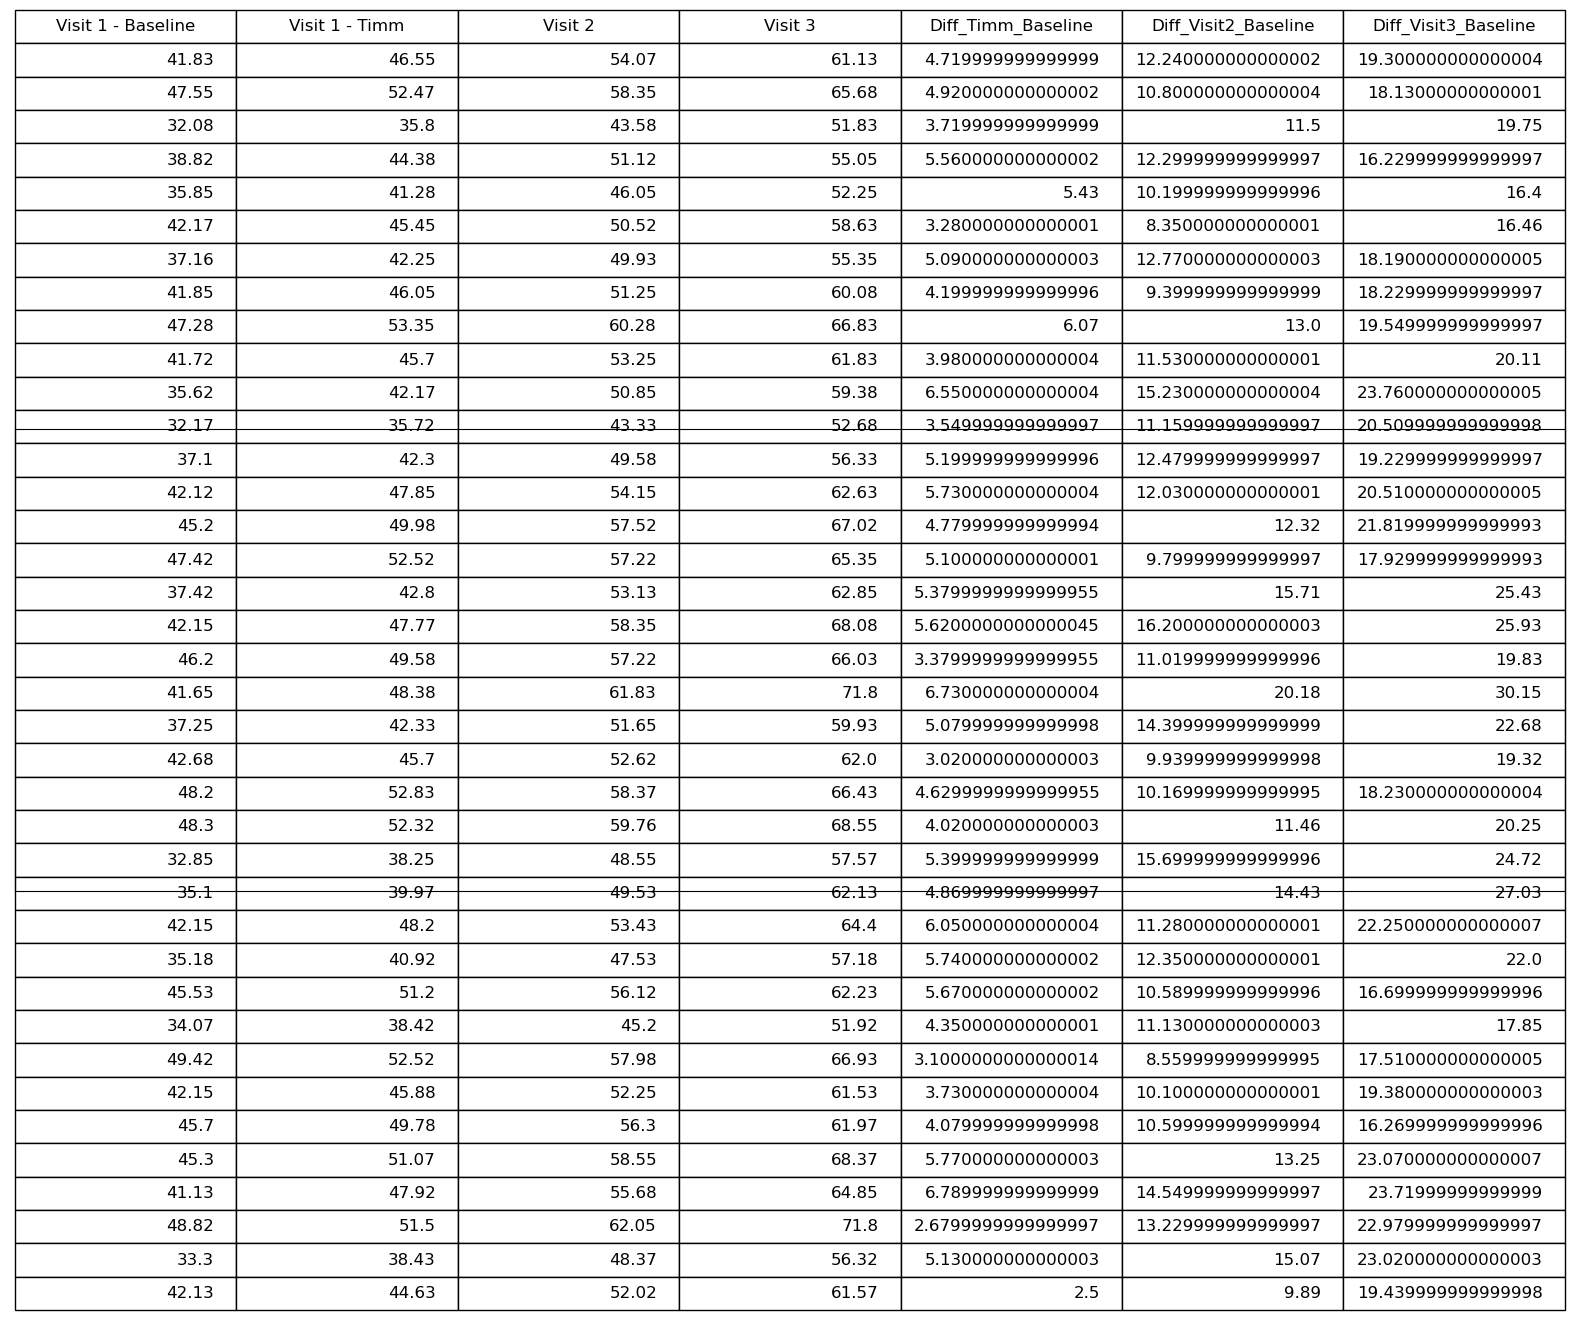

In [30]:
# Create a figure with increased height
plt.figure(figsize=(20, 6))  # Adjust the width and height as needed

# Create a table
table = plt.table(cellText=df.values, colLabels=df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)  # Set font size for table
table.scale(1, 2)  # Increase the height of the table

# Hide axes
ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Display the table
plt.show()


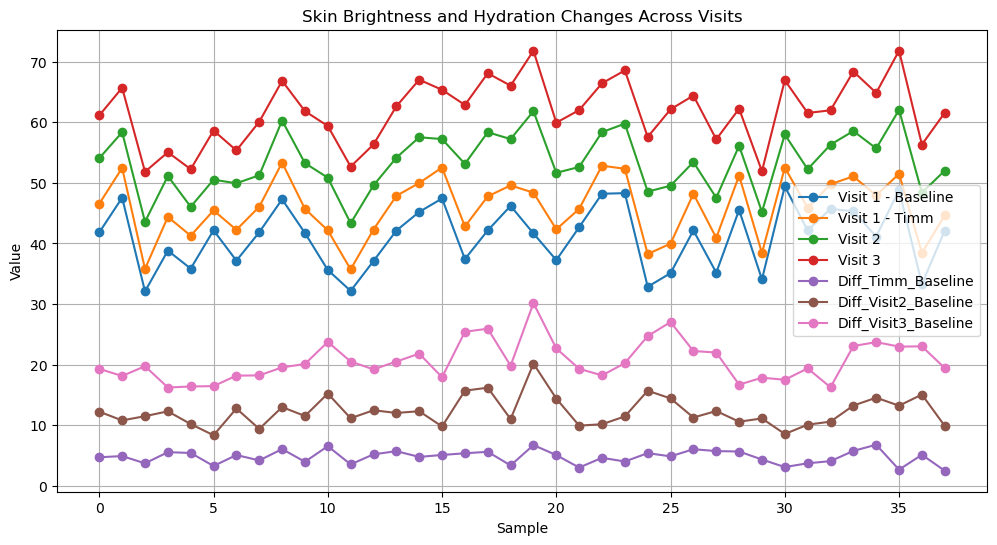

In [31]:
import matplotlib.pyplot as plt

# Create a line plot to visualize changes across visits
plt.figure(figsize=(12, 6))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.xlabel("Sample")
plt.ylabel("Value")
plt.title("Skin Brightness and Hydration Changes Across Visits")
plt.legend()
plt.grid(True)

# Save the plot as an image or display it
plt.savefig("skin_changes.png")
plt.show()


In [32]:
from scipy.stats import ttest_rel

# Perform paired t-tests
baseline_brightness = df["Visit 1 - Baseline"]
treatment_brightness = df["Visit 3"]

t_stat, p_value = ttest_rel(baseline_brightness, treatment_brightness)

# You can print or store the t-statistic and p-value
print(f"Paired t-test for brightness: t-statistic = {t_stat}, p-value = {p_value}")


Paired t-test for brightness: t-statistic = -38.912345343515085, p-value = 1.2717614114148491e-31


# conclusion
The study conducted paired t-tests to assess changes in skin hydration values at different time points, specifically Timm, Day 7, and Day 14. The results of these tests indicate highly significant changes in skin hydration levels, as evidenced by the extremely low p-values. Here are the main findings and their relevance in the context of skincare and cosmetics:

Significant Improvement in Skin Hydration:

The paired t-test for "Change_hydration_Timm" showed a remarkably high t-statistic of 26.24 and an extremely low p-value (approximately 1.63e-25), suggesting a significant increase in skin hydration compared to the baseline (Timm).

The test for "Change_hydration_Day7" yielded an even higher t-statistic of 31.06 and an even lower p-value (approximately 4.15e-28), indicating a substantial improvement in skin hydration compared to Day 7.

The most substantial change was observed at "Change_hydration_Day14," with a t-statistic of 38.92 and an incredibly low p-value (approximately 1.26e-31), demonstrating that skin hydration levels continued to improve significantly up to Day 14.

Relevance in Skincare and Cosmetics:

These findings are highly relevant in the context of skincare and cosmetics. Skin hydration is a critical parameter for skin health and appearance. Dehydrated skin can lead to various issues, including dryness, flakiness, and premature aging. Therefore, any product or treatment that can significantly increase skin hydration is of great interest to the skincare and cosmetics industry.

The study's results suggest that the tested products or interventions had a profound and rapid impact on improving skin hydration. This could be of considerable importance to consumers looking for effective skincare solutions that provide visible and rapid results.

Additionally, the study's rigorous statistical analysis, as indicated by the extremely low p-values, lends credibility to the findings. This is crucial in an industry where product claims are often met with skepticism, and consumers seek evidence of effectiveness.

In summary, the study's main findings reveal a significant and rapid improvement in skin hydration, with the most substantial changes occurring by Day 14. These findings have substantial relevance in the skincare and cosmetics industry, as they suggest the efficacy of the tested products or interventions in enhancing skin hydration, which is a fundamental aspect of maintaining healthy and youthful-looking skin.
Thank you.





